In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### (i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [4]:
data = pd.read_csv('ENB2012_data.csv')
df = pd.DataFrame(data)

print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB
None
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
2

In [5]:
df1 = df.dropna()
print(df1)

       X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
..    ...    ...    ...     ...  ...  ...  ...  ...    ...    ...
763  0.64  784.0  343.0  220.50  3.5  5.0  0.4  5.0  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5  2.0  0.4  5.0  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5  3.0  0.4  5.0  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5  4.0  0.4  5.0  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5  5.0  0.4  5.0  16.64  16.03

[768 rows x 10 columns]


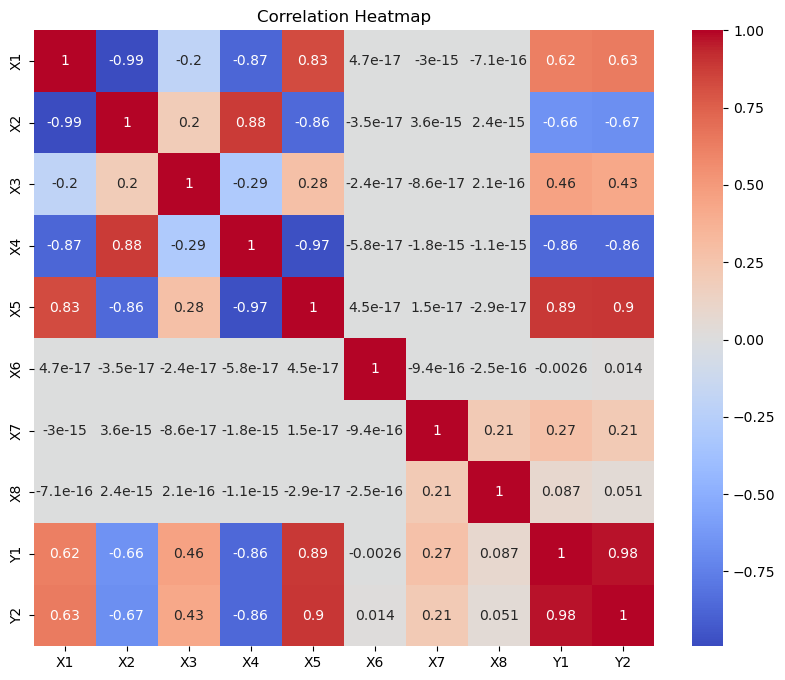

In [6]:
# Visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### (ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [18]:
from sklearn.model_selection import train_test_split
#Ignoring the features having weak/no correlation.
features_col = ['X1','X2','X4','X5','X7']
target_col = ['Y1']
x = df1[features_col]
y = df1[target_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=64, test_size=0.2)

### Multivariate linear regression

In [19]:
x_b = np.c_[np.ones((x.shape[0], 1)), x] 
# Step 2: Compute the model parameters (beta) using the Normal Equation
# beta = (X^T * X)^-1 * X^T * y
beta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

# Step 3: Make predictions on the test set

x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]  # Add bias term to the test set
y_pred = x_test_b.dot(beta)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the performance metrics
print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R²: 0.8961151771296116
MSE: 10.87381721308373
RMSE: 3.297547151002352


### Linear Regression using sklearn Library

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
lr_model = LinearRegression()
#training data
lr_model.fit(x_train, y_train)
# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print(f"R² Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R² Score: 0.8961151771296116
MSE: 10.933872800936186
RMSE: 3.3066407124052932


### Ridge and Lasso regression using  sklearn library

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
# Initialize Ridge and Lasso regression models
ridge_model = Ridge(alpha=1.0)  
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength


ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

# Predictions 
y_pred_ridge = ridge_model.predict(x_test)
y_pred_lasso = lasso_model.predict(x_test)

In [15]:
# Evaluate the models
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
   
    return r2, mse,rmse

# Evaluate Ridge and Lasso models
r2_ridge, mse_ridge,rmse_ridge = evaluate_model(y_test, y_pred_ridge)
r2_lasso, mse_lasso,rmse_lasso = evaluate_model(y_test, y_pred_lasso)

# Print results
print("Ridge Regression Results:")
print(f"R²: {r2_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")



print("\nLasso Regression Results:")
print(f"R²: {r2_lasso}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")




Ridge Regression Results:
R²: 0.8941132959901625
MSE: 11.083357827306541
RMSE: 3.329167737934894

Lasso Regression Results:
R²: 0.8914418284816896
MSE: 11.362985289482314
RMSE: 3.370902741029814


### Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

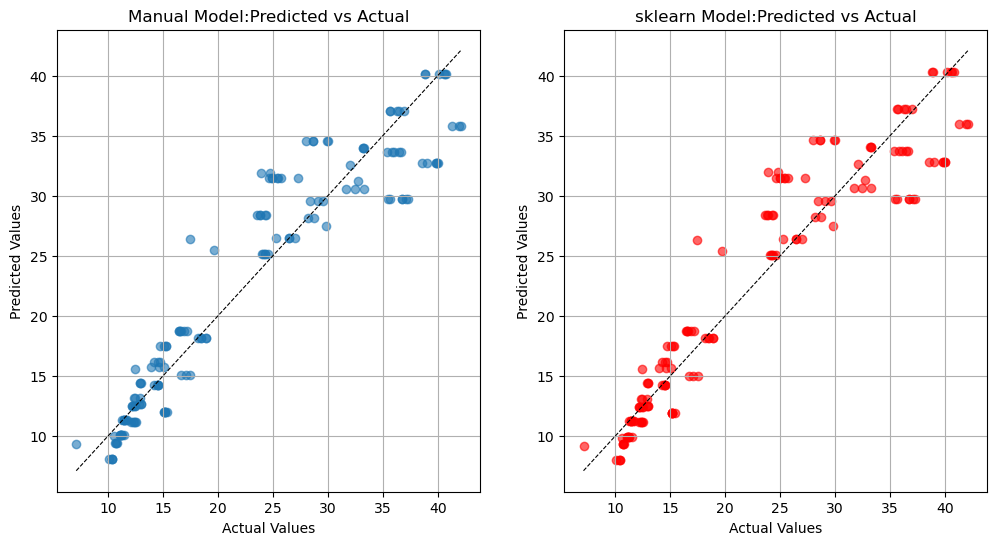

In [16]:
plt.figure(figsize=(12, 6))

# Manual Model
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred , alpha = 0.6, marker = 'o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)
plt.title('Manual Model:Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)



# sklearn Model
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_lr, alpha = 0.6, marker = 'o', c='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)
plt.title('sklearn Model:Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)



### (v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load

In [17]:
correlation = df.corrwith(df['Y1'])
correlation

X1    0.622272
X2   -0.658120
X3    0.455671
X4   -0.861828
X5    0.889431
X6   -0.002587
X7    0.269841
X8    0.087368
Y1    1.000000
Y2    0.975862
dtype: float64

- X5 has the strongest positive correlation with the heating load (Y1) at 0.889.Reducing the Overall Height will significantly decrease the heating load, as taller buildings tend to require more energy to heat due to increased air volume.
- X2 has a negative correlation with the heating load at -0.658.Increasing the Surface Area (e.g., wall area or roof area) can help reduce the heating load. Larger surface areas may allow better heat distribution or utilize passive solar heating.
- X4 has the strongest negative correlation with the heating load at -0.862. Increasing Wall Area may improve natural insulation or allow better integration of energy-efficient design features, reducing the need for heating.